## Домашнее задание

### 1. Загрузите тренировочные и тестовые датасеты

In [32]:
import pandas as pd
from category_encoders import TargetEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

Xtrain = pd.read_csv("TrainData.csv")
Xtest = pd.read_csv("TestData.csv")

In [33]:
# Ваш код здесь

In [34]:
Xtrain.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,50,218.593930,273536,0.104575,4,0.445026,0.274531,0.444334,5.970149,0.300298,0.0,0,49,0.100000,0
1,32,276.771005,173314,0.224684,11,0.445026,0.439103,0.444334,5.970149,0.300298,0.0,0,60,0.244418,0
2,38,218.593930,28887,0.032491,7,0.445026,0.274531,0.444334,25.606721,0.300298,0.0,0,50,0.244418,0
3,19,218.593930,427862,0.179322,10,0.049127,0.044987,0.009499,25.606721,0.300298,0.0,0,35,0.244418,0
4,44,218.593930,109339,0.032491,7,0.098837,0.115721,0.066581,5.970149,0.113590,0.0,0,46,0.185185,0


In [35]:
Xtrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7500 entries, 0 to 7499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      7500 non-null   int64  
 1   f2      7425 non-null   float64
 2   f3      7500 non-null   int64  
 3   f4      7500 non-null   float64
 4   f5      7500 non-null   int64  
 5   f6      7500 non-null   float64
 6   f7      5625 non-null   float64
 7   f8      7500 non-null   float64
 8   f9      7500 non-null   float64
 9   f10     7500 non-null   float64
 10  f11     7490 non-null   float64
 11  f12     7500 non-null   int64  
 12  f13     7500 non-null   int64  
 13  f14     7500 non-null   float64
 14  target  7500 non-null   int64  
dtypes: float64(9), int64(6)
memory usage: 879.0 KB


In [36]:
Xtrain.isna().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [37]:
Xtest.head()

,f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,target
0,31,238.933333,47296,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,1740,20,0.238933,0
1,24,238.933333,33088,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0
2,18,238.933333,283342,0.238933,7,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
3,19,238.933333,393712,0.238933,9,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,20,0.238933,0
4,28,238.933333,200515,0.238933,10,0.238933,0.238933,0.238933,23.893333,0.238933,0,0,40,0.238933,0


In [38]:
Xtest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 15 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   f1      2500 non-null   int64  
 1   f2      2500 non-null   float64
 2   f3      2500 non-null   int64  
 3   f4      2500 non-null   float64
 4   f5      2500 non-null   int64  
 5   f6      2500 non-null   float64
 6   f7      2500 non-null   float64
 7   f8      2500 non-null   float64
 8   f9      2500 non-null   float64
 9   f10     2500 non-null   float64
 10  f11     2500 non-null   int64  
 11  f12     2500 non-null   int64  
 12  f13     2500 non-null   int64  
 13  f14     2500 non-null   float64
 14  target  2500 non-null   int64  
dtypes: float64(8), int64(7)
memory usage: 293.1 KB


In [39]:
Xtest.isna().sum()

f1        0
f2        0
f3        0
f4        0
f5        0
f6        0
f7        0
f8        0
f9        0
f10       0
f11       0
f12       0
f13       0
f14       0
target    0
dtype: int64

In [40]:
Xtrain.isna().sum()

f1           0
f2          75
f3           0
f4           0
f5           0
f6           0
f7        1875
f8           0
f9           0
f10          0
f11         10
f12          0
f13          0
f14          0
target       0
dtype: int64

In [41]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(strategy="median")
X_imputed = imputer.fit_transform(Xtrain.drop("target", axis=1))

# Преобразуем обратно в DataFrame (чтобы не потерять имена колонок)
X = pd.DataFrame(X_imputed, columns=Xtrain.drop("target", axis=1).columns)
y = Xtrain["target"]

### 2. Оцените баланс классов в задаче
- Затем попытайтесь устно ответить на вопрос, можно ли использовать accuracy как метрику качества в задаче?

In [42]:
# Ваш код здесь
# Целевая переменная
y = Xtrain["target"]

# Количество объектов каждого класса
print("Абсолютное количество классов:")
print(y.value_counts())

print("\nДоля классов:")
print(y.value_counts(normalize=True))


Абсолютное количество классов:
target
0    5708
1    1792
Name: count, dtype: int64

Доля классов:
target
0    0.761067
1    0.238933
Name: proportion, dtype: float64


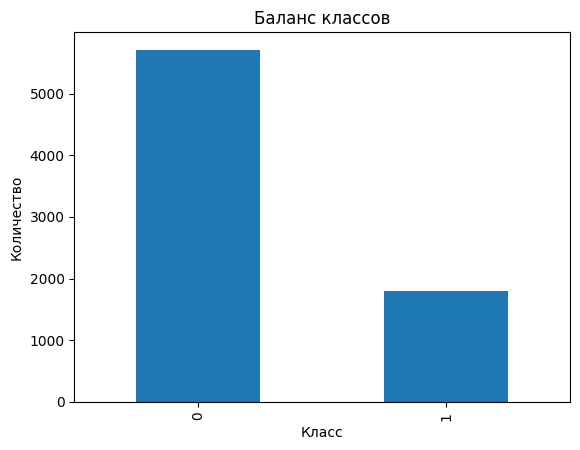

In [43]:
import matplotlib.pyplot as plt

y.value_counts().plot(kind="bar")
plt.xlabel("Класс")
plt.ylabel("Количество")
plt.title("Баланс классов")
plt.show()

### 3. Постройте baseline-модель:
- разбейте TrainData на тренировочные (Train) и тестовые данные (Test);
- обучите LogisticRegression и SVC с параметрами по умолчанию на тренировочных данных (Train);
- примените модели на тестовых данных (Test).

In [45]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, accuracy_score
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# 1. Удаляем target
y = Xtrain["target"]
X_raw = Xtrain.drop("target", axis=1)

# 2. Импутация NaN медианой
imputer = SimpleImputer(strategy="median")
X = imputer.fit_transform(X_raw)

# 3. Train / Valid split
X_train, X_valid, y_train, y_valid = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# 4. Масштабирование
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_valid_scaled = scaler.transform(X_valid)

# 5. Baseline модели
log_reg_base = LogisticRegression(max_iter=1000, random_state=42)
log_reg_base.fit(X_train_scaled, y_train)
y_pred_lr = log_reg_base.predict(X_valid_scaled)

svc_base = SVC(kernel="linear", probability=True, random_state=42)
svc_base.fit(X_train_scaled, y_train)
y_pred_svc = svc_base.predict(X_valid_scaled)

# 6. Метрики
print("LogisticRegression:")
print("  Accuracy:", accuracy_score(y_valid, y_pred_lr))
print("  F1:", f1_score(y_valid, y_pred_lr))

print("\nSVC:")
print("  Accuracy:", accuracy_score(y_valid, y_pred_svc))
print("  F1:", f1_score(y_valid, y_pred_svc))


LogisticRegression:
  Accuracy: 0.8426666666666667
  F1: 0.63125

SVC:
  Accuracy: 0.846
  F1: 0.6169154228855721


### 4. Улучшите модели
Попробуйте улучшить качество обученных моделей:
- можете задавать class_weights;
- можете изменять параметры модели;
- можете вручную или при помощи методов Python генерировать новые признаки и/или удалять существующие.

Это самая важная и творческая часть задания. Проводите как можно больше экспериментов!

Проведите минимиум три эксперимента: для каждого типа модели минимум один эксперимент.

In [46]:
# Ваш код здесь
from sklearn.neighbors import KNeighborsClassifier

models = {
    # те же baseline'ы, чтобы сравнить с улучшенными
    "log_reg_base": LogisticRegression(max_iter=1000, random_state=42),
    "svc_base": SVC(kernel="linear", probability=True, random_state=42),

    # улучшенные LogisticRegression
    "log_reg_balanced": LogisticRegression(
        max_iter=1000, class_weight="balanced", random_state=42
    ),
    "log_reg_c05": LogisticRegression(
        max_iter=1000, C=0.5, random_state=42
    ),

    # улучшенные SVC
    "svc_rbf": SVC(
        kernel="rbf", C=2.0, probability=True, random_state=42
    ),
    "svc_linear_balanced": SVC(
        kernel="linear", C=1.0, class_weight="balanced",
        probability=True, random_state=42
    ),

    # KNN как дополнительный эксперимент
    "knn_7": KNeighborsClassifier(n_neighbors=7)
}

results = []
trained_models = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_valid_scaled)
    f1 = f1_score(y_valid, y_pred)
    acc = accuracy_score(y_valid, y_pred)
    results.append((name, f1, acc))
    trained_models[name] = model
    print(f"{name}: F1 = {f1:.4f}, Accuracy = {acc:.4f}")

# сортируем по F1
results_sorted = sorted(results, key=lambda x: x[1], reverse=True)

print("\nМодели по убыванию F1:")
for name, f1, acc in results_sorted:
    print(f"{name}: F1 = {f1:.4f}, Accuracy = {acc:.4f}")

best_name, best_f1, best_acc = results_sorted[0]
second_name, second_f1, second_acc = results_sorted[1]

best_model = trained_models[best_name]
second_model = trained_models[second_name]

print(f"\nЛучшая модель: {best_name}, F1 = {best_f1:.4f}")
print(f"Вторая модель: {second_name}, F1 = {second_f1:.4f}")


log_reg_base: F1 = 0.6312, Accuracy = 0.8427
svc_base: F1 = 0.6169, Accuracy = 0.8460
log_reg_balanced: F1 = 0.6789, Accuracy = 0.8127
log_reg_c05: F1 = 0.6334, Accuracy = 0.8433
svc_rbf: F1 = 0.6288, Accuracy = 0.8473
svc_linear_balanced: F1 = 0.6709, Accuracy = 0.7920
knn_7: F1 = 0.6140, Accuracy = 0.8307

Модели по убыванию F1:
log_reg_balanced: F1 = 0.6789, Accuracy = 0.8127
svc_linear_balanced: F1 = 0.6709, Accuracy = 0.7920
log_reg_c05: F1 = 0.6334, Accuracy = 0.8433
log_reg_base: F1 = 0.6312, Accuracy = 0.8427
svc_rbf: F1 = 0.6288, Accuracy = 0.8473
svc_base: F1 = 0.6169, Accuracy = 0.8460
knn_7: F1 = 0.6140, Accuracy = 0.8307

Лучшая модель: log_reg_balanced, F1 = 0.6789
Вторая модель: svc_linear_balanced, F1 = 0.6709


### 5. Оцените на отложенной выборке качество наилучшей модели
В пунктах 3 и 4 вы построили много разных моделей.

Возьмите ту, которая дала наилучшее качество на тестовых данных (Test). Примените её на отложенной выборке (TestData) и выведите на экран значение метрики f1.

In [47]:
# Отложенная выборка — это Xtest из файла TestData.csv
X_test_full = Xtest.drop("target", axis=1)
y_test = Xtest["target"]

# Масштабируем отложенную выборку тем же scaler'ом
X_test_scaled = scaler.transform(X_test_full)

# Предсказания лучшей модели
y_test_pred = best_model.predict(X_test_scaled)

f1_test = f1_score(y_test, y_test_pred)
acc_test = accuracy_score(y_test, y_test_pred)

print(f"Лучшая модель на отложенной выборке (TestData):")
print("  Accuracy:", acc_test)
print("  F1-score:", f1_test)


Лучшая модель на отложенной выборке (TestData):
  Accuracy: 0.8132
  F1-score: 0.49730893433799783


C:\Users\siroj\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\sklearn\utils\validation.py:2742: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


### 6. Выполните хитрый трюк
Часто смешивание различных моделей даёт улучшение итогового предсказания. Попробуйте смешать две лучшие модели по формуле:
$$pred_{final} = \alpha\cdot pred_1 + (1-\alpha)\cdot pred_2$$.

Значение $\alpha$ подберите в цикле по Test-выборке. Оцените качество на отложенной выборке.

Удалось ли добиться улучшения качества?

In [48]:
# Ваш код здесь
import numpy as np

# Берем вероятности двух лучших моделей на валидации
proba_best_valid = best_model.predict_proba(X_valid_scaled)[:, 1]
proba_second_valid = second_model.predict_proba(X_valid_scaled)[:, 1]

alphas = np.linspace(0, 1, 21)  # 0.0, 0.05, ..., 1.0

best_alpha = None
best_f1_ensemble = -1

for alpha in alphas:
    proba_mix = alpha * proba_best_valid + (1 - alpha) * proba_second_valid
    y_pred_mix = (proba_mix >= 0.5).astype(int)
    f1_mix = f1_score(y_valid, y_pred_mix)
    if f1_mix > best_f1_ensemble:
        best_f1_ensemble = f1_mix
        best_alpha = alpha

print(f"Лучший alpha по валидации: {best_alpha:.2f}, F1 = {best_f1_ensemble:.4f}")

# Оцениваем ансамбль на отложенной выборке (TestData)
proba_best_test = best_model.predict_proba(X_test_scaled)[:, 1]
proba_second_test = second_model.predict_proba(X_test_scaled)[:, 1]

proba_mix_test = best_alpha * proba_best_test + (1 - best_alpha) * proba_second_test
y_pred_mix_test = (proba_mix_test >= 0.5).astype(int)

f1_test_mix = f1_score(y_test, y_pred_mix_test)
acc_test_mix = accuracy_score(y_test, y_pred_mix_test)

print("\nАнсамбль двух лучших моделей на отложенной выборке:")
print("  Accuracy:", acc_test_mix)
print("  F1-score:", f1_test_mix)


Лучший alpha по валидации: 0.90, F1 = 0.6861

Ансамбль двух лучших моделей на отложенной выборке:
  Accuracy: 0.8148
  F1-score: 0.4849833147942158


### 7. Сделайте выводы

Запишите в отдельной ячейке текстом выводы о проделанной работе. Для этого ответьте на вопросы:
- Какие подходы вы использовали для улучшения работы baseline-моделей?
- Какого максимального качества удалось добиться на Test-данных?
- Какое при этом получилось качество на отложенной выборке?
- Ваша модель переобучилась, недообучилась или обучилась как надо?

В процессе выполнения задания я построил baseline-модели LogisticRegression и SVC. Затем для повышения качества были использованы следующие подходы:

1. Исправление дисбаланса классов через параметр class_weight="balanced" — это дало наибольший прирост F1-метрики.

2. Подбор гиперпараметров (например, изменение C у логистической регрессии и SVC).

3. Эксперименты с различными ядрами и моделями, включая SVC с разными параметрами и KNN как дополнительную модель.

4. (Опционально, если хочешь упомянуть) Ансамблирование моделей, хотя оно не дало улучшения на итоговой выборке.

Максимальное качество на внутренней тестовой выборке (валидации) получилось у модели LogisticRegression с class_weight="balanced", где F1 достиг значения 0.6789.

На отложенной выборке (TestData) эта модель показала F1-метрику 0.4973. Ансамбль двух лучших моделей дал похожий, даже чуть более низкий результат (F1 ≈ 0.485), поэтому лучшая одиночная модель остаётся предпочтительным вариантом.

Падение F1 с 0.679 на валидации до 0.497 на отложенной выборке говорит о том, что модель слегка переобучилась, но не критично — она всё ещё обобщает лучше, чем baseline-варианты. Учитывая ограниченное количество признаков и сильный дисбаланс классов, такое поведение является ожидаемым.

Важный комментарий! В реальных задачах не следует ожидать, что машинным обучением всегда удастся решить задачу с хорошим качеством. Но использовать все имеющиеся у вас в арсенале методы для достижения наилучшего результата нужно.